# Buy/Sell Decisions based on Sentiment Analysis using News Headlines

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Data/Data.csv', encoding = "ISO-8859-1")
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [ ]:
# Splitting data into train & test
train = df[df['Date'] < '20140101']
test = df[df['Date'] > '20131231']
train.shape
test.shape

(3723, 27)

(630, 27)

In [ ]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [ ]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [ ]:
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [ ]:
headlines_train = []
for row in range(0,len(data.index)):
    headlines_train.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [ ]:
headlines_train[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [ ]:
# Removing punctuations
data=test.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index

# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3471,japan s population falls by record i...,kolkata police hijack rape victim s hearse ...,young people feel they have nothing to live for,rob ford proclaims himself the best mayor that...,the us has been voted as the most significant ...,blast that killed palestinian ambassador occur...,jp morgan bonuses for top london staff in ...,global poll us is the greatest threat to worl...,al qaeda in iraq dictates men s clothing choic...,fox flesh found in donkey meat package at wal ...,...,rape suspect stoned to death by irate mob the...,new protests after suicide of year old gang...,indian lawyer kapila hingorani who assisted...,japan s state secrets law hailed by u s den...,walmart recalls donkey meat from china stores ...,skype twitter account hacked by syrian electro...,palestinian ambassador opens year old safe ...,an australian father has been charged by polic...,charity fundraiser dressed as superhero attack...,putin sends new year s greetings to obama


In [ ]:
headlines_test = []
for row in range(0,len(data.index)):
    headlines_test.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize

## A. Machine Learning Models

### 1.Count Vectorizer





In [ ]:
## implement BAG OF WORDS
countvector=CountVectorizer(tokenizer=word_tokenize, token_pattern=None, ngram_range=(1,2))
traindataset=countvector.fit_transform(headlines_train)

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV

n_estimators = [20, 50, 100, 150, 200, 250, 300]
max_depth= [3, 4, 5, 8, 12, 'None']
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
gsmodel = RandomForestClassifier(random_state=42, n_jobs=-1)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=gsmodel, param_grid=param_grid, scoring="balanced_accuracy", cv=kfold)
grid_result = grid.fit(traindataset, train['Label'])

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
# for mean, stdev, param, rank in zip(means, stds, params, ranks):
#     print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.501396 using {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 20}


In [ ]:
randomclassifier=RandomForestClassifier(criterion = grid_result.best_params_['criterion'], 
                              n_estimators = grid_result.best_params_['n_estimators'], 
                              max_depth = grid_result.best_params_['max_depth'], random_state=42)
randomclassifier.fit(traindataset, train['Label'])

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=20,
                       random_state=42)

In [ ]:
## Predict for the Test Dataset
test_dataset = countvector.transform(headlines_test)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score
conf_m=confusion_matrix(test['Label'],predictions)
print(conf_m)
print("-------------------------")
acc_s=accuracy_score(test['Label'],predictions)
print(f"accuracy: {acc_s:.2f}")
bacc_s=balanced_accuracy_score(test['Label'],predictions)
print(f"balanced accuracy: {bacc_s:.2f}")
ck_s=cohen_kappa_score(test['Label'],predictions)
print(f"cohen's kappa: {ck_s:.2f}")

[[ 23 276]
 [  3 328]]
-------------------------
accuracy: 0.56
balanced accuracy: 0.53
cohen's kappa: 0.07


In [ ]:
train['Label'].mean()

0.5302175664786463

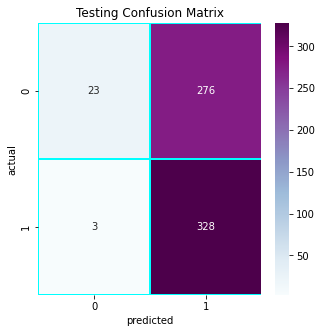

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_m, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Testing Confusion Matrix')
plt.xlabel('predicted', )
plt.ylabel('actual')
plt.show();

### 2.TFID Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import word_tokenize

In [ ]:
## implement BAG OF WORDS
tfidvector=TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, ngram_range=(1,2))
traindataset=tfidvector.fit_transform(headlines_train)

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV

n_estimators = [20, 50, 100, 150, 200, 250, 300]
max_depth= [3, 4, 5, 8, 12, 'None']
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
gsmodel = RandomForestClassifier(random_state=42, n_jobs=-1)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=gsmodel, param_grid=param_grid, scoring="balanced_accuracy", cv=kfold)
grid_result = grid.fit(traindataset, train['Label'])

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
# for mean, stdev, param, rank in zip(means, stds, params, ranks):
#     print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.505342 using {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50}


In [ ]:
randomclassifier=RandomForestClassifier(criterion = grid_result.best_params_['criterion'], 
                              n_estimators = grid_result.best_params_['n_estimators'], 
                              max_depth = grid_result.best_params_['max_depth'], random_state=42)
randomclassifier.fit(traindataset, train['Label'])

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

In [ ]:
## Predict for the Test Dataset
test_dataset = countvector.transform(headlines_test)
predictions = randomclassifier.predict(test_dataset)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score
conf_m=confusion_matrix(test['Label'],predictions)
print(conf_m)
print("-------------------------")
acc_s=accuracy_score(test['Label'],predictions)
print(f"accuracy: {acc_s:.2f}")
bacc_s=balanced_accuracy_score(test['Label'],predictions)
print(f"balanced accuracy: {bacc_s:.2f}")
ck_s=cohen_kappa_score(test['Label'],predictions)
print(f"cohen's kappa: {ck_s:.2f}")

[[ 50 249]
 [ 36 295]]
-------------------------
accuracy: 0.55
balanced accuracy: 0.53
cohen's kappa: 0.06


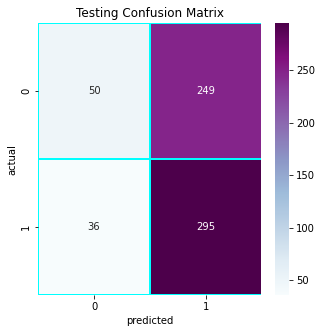

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_m, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Testing Confusion Matrix')
plt.xlabel('predicted', )
plt.ylabel('actual')
plt.show();

### 3.Word2Vec

In [ ]:
from gensim.models import KeyedVectors
from gensim import models

word2vec_path = '/content/drive/MyDrive/Colab Data/GoogleNews-vectors-negative300.bin.gz'
w2v_model = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [ ]:
headlines_train = pd.DataFrame(headlines_train, columns=["headlines"])
headlines_train.head(3)

,headlines
0,a hindrance to operations extracts from the...
1,scorecard the best lake scene leader german s...
2,coventry caught on counter by flo united s riv...


In [ ]:
traindataset = headlines_train["headlines"].apply(lambda text: np.mean([w2v_model[word] for word in text.split() if word in w2v_model], axis=0))
traindataset = pd.DataFrame(np.vstack(traindataset))
traindataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.014155,0.066780,-0.016551,0.067721,-0.033583,-0.025058,-0.004632,-0.107865,0.055811,0.110056,...,-0.004202,0.010812,-0.094273,0.027771,-0.050508,-0.037531,-0.000595,-0.074847,0.006279,0.042108
1,0.016676,0.058779,0.065501,0.074488,-0.053246,-0.016464,0.029059,-0.087770,0.083148,0.069340,...,-0.024967,0.016940,-0.077081,0.037281,-0.052643,0.000297,-0.020481,-0.049657,-0.011344,0.007745
2,-0.014619,0.045051,0.026015,0.098325,-0.009698,-0.012051,-0.013056,-0.129038,0.016051,0.096979,...,-0.015584,0.074591,-0.067722,0.056172,-0.057756,-0.024615,-0.027692,-0.052266,-0.009442,0.041312


In [ ]:
for ii in range(len(traindataset)):
    traindataset.iloc[ii, :] = traindataset.iloc[ii, :]/np.sqrt((traindataset.iloc[ii, :]**2).sum())

traindataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.017925,0.084566,-0.020959,0.085757,-0.042527,-0.031732,-0.005866,-0.136593,0.070675,0.139367,...,-0.005321,0.013692,-0.119381,0.035168,-0.063959,-0.047526,-0.000754,-0.094781,0.007952,0.053323
1,0.020624,0.072692,0.081006,0.092119,-0.065850,-0.020361,0.035937,-0.108546,0.102829,0.085753,...,-0.030877,0.020950,-0.095326,0.046106,-0.065104,0.000367,-0.025329,-0.061411,-0.014029,0.009578
2,-0.017042,0.052520,0.030328,0.114625,-0.011306,-0.014049,-0.015221,-0.150429,0.018712,0.113056,...,-0.018168,0.086956,-0.078949,0.065484,-0.067330,-0.028696,-0.032283,-0.060930,-0.011008,0.048160


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV

n_estimators = [20, 50, 100, 150, 200, 250, 300]
max_depth= [3, 4, 5, 8, 12, 'None']
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
gsmodel = RandomForestClassifier(random_state=42, n_jobs=-1)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=gsmodel, param_grid=param_grid, scoring="balanced_accuracy", cv=kfold)
grid_result = grid.fit(traindataset, train['Label'])

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
# for mean, stdev, param, rank in zip(means, stds, params, ranks):
#     print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.507982 using {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100}


In [ ]:
randomclassifier=RandomForestClassifier(criterion = grid_result.best_params_['criterion'], 
                              n_estimators = grid_result.best_params_['n_estimators'], 
                              max_depth = grid_result.best_params_['max_depth'], random_state=42)
randomclassifier.fit(traindataset, train['Label'])

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=42)

In [ ]:
headlines_test = pd.DataFrame(headlines_test, columns=["headlines"])

In [ ]:
testdataset = headlines_test["headlines"].apply(lambda text: np.mean([w2v_model[word] for word in text.split() if word in w2v_model], axis=0))
testdataset = pd.DataFrame(np.vstack(testdataset))
testdataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.018403,0.050345,0.047094,0.071584,-0.044083,-0.026792,-0.005129,-0.086200,0.073046,0.081252,...,-0.041142,-0.000332,-0.081577,0.035109,-0.035490,-0.000276,-0.020402,-0.053804,0.015743,0.011534
1,0.006212,0.045099,0.042855,0.076040,-0.050687,-0.011356,0.002430,-0.085703,0.065222,0.072120,...,-0.043993,0.015298,-0.075742,0.039631,-0.022834,-0.004826,-0.055621,-0.049623,0.032563,0.003815
2,0.019077,0.057012,0.026235,0.071188,-0.042394,-0.040481,0.001308,-0.105409,0.076006,0.091313,...,-0.057854,0.001574,-0.067737,0.032847,-0.041839,-0.004752,-0.018315,-0.023560,0.046958,0.006051


In [ ]:
for ii in range(len(testdataset)):
    testdataset.iloc[ii, :] = testdataset.iloc[ii, :]/np.sqrt((testdataset.iloc[ii, :]**2).sum())

testdataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.024648,0.067429,0.063074,0.095874,-0.059041,-0.035884,-0.006869,-0.115450,0.097833,0.108823,...,-0.055103,-0.000445,-0.109258,0.047022,-0.047533,-0.000370,-0.027324,-0.072061,0.021085,0.015447
1,0.008126,0.058994,0.056059,0.099468,-0.066305,-0.014856,0.003179,-0.112110,0.085317,0.094341,...,-0.057548,0.020012,-0.099080,0.051841,-0.029869,-0.006313,-0.072758,-0.064913,0.042596,0.004991
2,0.025239,0.075427,0.034709,0.094182,-0.056088,-0.053556,0.001731,-0.139456,0.100555,0.120807,...,-0.076541,0.002082,-0.089616,0.043456,-0.055352,-0.006286,-0.024230,-0.031170,0.062126,0.008005


In [ ]:
predictions = randomclassifier.predict(testdataset)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score
conf_m=confusion_matrix(test['Label'],predictions)
print(conf_m)
print("-------------------------")
acc_s=accuracy_score(test['Label'],predictions)
print(f"accuracy: {acc_s:.2f}")
bacc_s=balanced_accuracy_score(test['Label'],predictions)
print(f"balanced accuracy: {bacc_s:.2f}")
ck_s=cohen_kappa_score(test['Label'],predictions)
print(f"cohen's kappa: {ck_s:.2f}")

[[ 50 249]
 [  3 328]]
-------------------------
accuracy: 0.60
balanced accuracy: 0.58
cohen's kappa: 0.16


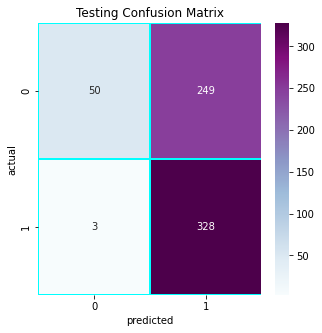

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_m, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Testing Confusion Matrix')
plt.xlabel('predicted', )
plt.ylabel('actual')
plt.show();

### 4.FastText

In [ ]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.array(list(map(float, tokens[1:])))
    return data

In [ ]:
word2vec_path = '/content/drive/MyDrive/Colab Data/crawl-300d-2M.vec'
w2v_model = load_vectors(word2vec_path)

In [ ]:
headlines_train = pd.DataFrame(headlines_train, columns=["headlines"])
headlines_train.head(3)

,headlines
0,a hindrance to operations extracts from the...
1,scorecard the best lake scene leader german s...
2,coventry caught on counter by flo united s riv...


In [ ]:
traindataset = headlines_train["headlines"].apply(lambda text: np.mean([w2v_model[word] for word in text.split() if word in w2v_model], axis=0))
traindataset = pd.DataFrame(np.vstack(traindataset))
traindataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.015548,-0.007512,-0.071056,-0.066811,-0.003614,0.039495,-0.058733,-0.013431,0.052639,-0.029294,...,0.075063,0.046051,-0.013929,0.047744,0.033812,0.001890,0.017530,-0.055446,-0.043828,-0.050032
1,0.013423,-0.056801,-0.064919,-0.065972,0.032497,0.036161,-0.075893,-0.019895,0.008682,-0.063203,...,0.011579,-0.020786,-0.030429,0.033126,0.057242,-0.018543,-0.010709,-0.005545,-0.045617,-0.003166
2,0.019358,-0.037332,-0.050391,-0.098393,0.010180,0.013616,-0.029124,-0.066989,0.038646,-0.027699,...,0.053352,0.072636,-0.062389,0.079271,0.057318,0.033080,-0.029057,-0.089281,-0.006089,-0.048792


In [ ]:
# for ii in range(len(traindataset)):
#     traindataset.iloc[ii, :] = traindataset.iloc[ii, :]/np.sqrt((traindataset.iloc[ii, :]**2).sum())

# traindataset.head(3)

In [ ]:
# lrclassifier = LogisticRegression()
# lrclassifier.fit(traindataset, train['Label'])

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV

n_estimators = [20, 50, 100, 150, 200, 250, 300]
max_depth= [3, 4, 5, 8, 12, 'None']
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
gsmodel = RandomForestClassifier(random_state=42, n_jobs=-1)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=gsmodel, param_grid=param_grid, scoring="balanced_accuracy", cv=kfold)
grid_result = grid.fit(traindataset, train['Label'])

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
# for mean, stdev, param, rank in zip(means, stds, params, ranks):
#     print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.511442 using {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 200}


In [ ]:
randomclassifier=RandomForestClassifier(criterion = grid_result.best_params_['criterion'], 
                              n_estimators = grid_result.best_params_['n_estimators'], 
                              max_depth = grid_result.best_params_['max_depth'], random_state=42)
randomclassifier.fit(traindataset, train['Label'])

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42)

In [ ]:
headlines_test = pd.DataFrame(headlines_test, columns=["headlines"])

In [ ]:
testdataset = headlines_test["headlines"].apply(lambda text: np.mean([w2v_model[word] for word in text.split() if word in w2v_model], axis=0))
testdataset = pd.DataFrame(np.vstack(testdataset))
testdataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.042613,-0.093788,-0.062117,-0.078795,0.000465,0.012430,-0.059891,0.022324,0.022508,-0.022552,...,0.009782,0.015010,-0.029210,0.067287,-0.000731,-0.020872,-0.013281,0.001747,-0.031925,-0.003701
1,0.029065,-0.047541,-0.052948,-0.060470,-0.003096,0.030311,-0.102707,0.021971,0.061850,-0.021566,...,0.013237,0.009432,-0.032559,0.036709,0.004515,-0.008723,-0.035680,-0.033719,-0.014085,0.028941
2,0.052025,-0.057674,-0.043400,-0.075898,-0.006208,0.049883,-0.092382,0.021557,0.063705,-0.033318,...,-0.000677,0.001131,-0.014768,0.053123,0.018013,0.001682,-0.020923,-0.047834,0.012320,-0.008214


In [ ]:
# for ii in range(len(testdataset)):
#     testdataset.iloc[ii, :] = testdataset.iloc[ii, :]/np.sqrt((testdataset.iloc[ii, :]**2).sum())

# testdataset.head(3)

In [ ]:
# predictions = lrclassifier.predict(testdataset)

In [ ]:
predictions = randomclassifier.predict(testdataset)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score
conf_m=confusion_matrix(test['Label'],predictions)
print(conf_m)
print("-------------------------")
acc_s=accuracy_score(test['Label'],predictions)
print(f"accuracy: {acc_s:.2f}")
bacc_s=balanced_accuracy_score(test['Label'],predictions)
print(f"balanced accuracy: {bacc_s:.2f}")
ck_s=cohen_kappa_score(test['Label'],predictions)
print(f"cohen's kappa: {ck_s:.2f}")

[[118 181]
 [  7 324]]
-------------------------
accuracy: 0.70
balanced accuracy: 0.69
cohen's kappa: 0.38


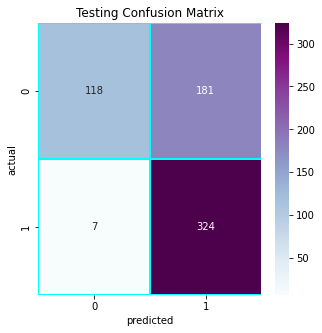

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_m, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Testing Confusion Matrix')
plt.xlabel('predicted', )
plt.ylabel('actual')
plt.show();

### 5.GloVe

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [ ]:
import numpy as np

def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

In [ ]:
word2vec_path = '/content/drive/MyDrive/Colab Data/glove.6B.300d.txt'
w2v_model = load_glove_model(word2vec_path)

Loading Glove Model
400000 words loaded!


In [ ]:
headlines_train = pd.DataFrame(headlines_train, columns=["headlines"])
headlines_train.head(3)

,headlines
0,a hindrance to operations extracts from the...
1,scorecard the best lake scene leader german s...
2,coventry caught on counter by flo united s riv...


In [ ]:
traindataset = headlines_train["headlines"].apply(lambda text: np.mean([w2v_model[word] for word in text.split() if word in w2v_model], axis=0))
traindataset = pd.DataFrame(np.vstack(traindataset))
traindataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.057116,0.117757,0.005698,-0.071793,0.026545,-0.006601,-0.021239,0.018504,0.007121,-0.870567,...,-0.140171,-0.013199,0.020491,0.052410,0.112443,0.141773,0.075873,-0.164939,-0.102446,0.055069
1,-0.032296,0.080155,0.020190,-0.088722,0.017333,-0.009070,-0.055778,0.005949,-0.008554,-1.257456,...,-0.056706,-0.170248,0.001402,-0.030415,0.052287,0.076617,0.041896,-0.147451,-0.105043,0.092836
2,-0.048361,0.114788,-0.025094,-0.073272,0.040941,0.004664,-0.111826,0.075513,-0.001503,-1.040941,...,-0.104667,-0.002896,-0.056441,0.034860,0.086908,0.240384,0.023196,-0.156711,-0.149638,0.013775


In [ ]:
# for ii in range(len(traindataset)):
#     traindataset.iloc[ii, :] = traindataset.iloc[ii, :]/np.sqrt((traindataset.iloc[ii, :]**2).sum())

# traindataset.head(3)

In [ ]:
# lrclassifier = LogisticRegression()
# lrclassifier.fit(traindataset, train['Label'])

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV

n_estimators = [20, 50, 100, 150, 200, 250, 300]
max_depth= [3, 4, 5, 8, 12, 'None']
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
gsmodel = RandomForestClassifier(random_state=42, n_jobs=-1)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=gsmodel, param_grid=param_grid, scoring="balanced_accuracy", cv=kfold)
grid_result = grid.fit(traindataset, train['Label'])

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
# for mean, stdev, param, rank in zip(means, stds, params, ranks):
#     print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.511546 using {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 50}


In [ ]:
randomclassifier=RandomForestClassifier(criterion = grid_result.best_params_['criterion'], 
                              n_estimators = grid_result.best_params_['n_estimators'], 
                              max_depth = grid_result.best_params_['max_depth'], random_state=42)
randomclassifier.fit(traindataset, train['Label'])

RandomForestClassifier(max_depth=12, n_estimators=50, random_state=42)

In [ ]:
headlines_test = pd.DataFrame(headlines_test, columns=["headlines"])

In [ ]:
testdataset = headlines_test["headlines"].apply(lambda text: np.mean([w2v_model[word] for word in text.split() if word in w2v_model], axis=0))
testdataset = pd.DataFrame(np.vstack(testdataset))
testdataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.107051,0.081703,-0.045053,-0.093360,-0.021639,0.003325,-0.029620,0.069883,0.014683,-1.290599,...,-0.005456,-0.188505,-0.011727,0.082363,0.061763,0.201837,0.049140,-0.102448,-0.171966,0.028384
1,-0.098994,0.088238,-0.041235,-0.119391,-0.063663,0.002822,-0.007508,0.094512,0.042674,-1.293545,...,-0.044882,-0.198067,-0.018184,0.012573,0.056060,0.252023,0.067572,-0.183137,-0.114030,0.009046
2,-0.069498,0.099681,-0.043792,-0.103303,-0.077538,0.041505,-0.057116,0.103885,0.018913,-1.344042,...,-0.066689,-0.147418,0.026291,0.004805,0.071424,0.266004,0.047946,-0.172384,-0.127140,0.037474


In [ ]:
# for ii in range(len(testdataset)):
#     testdataset.iloc[ii, :] = testdataset.iloc[ii, :]/np.sqrt((testdataset.iloc[ii, :]**2).sum())

# testdataset.head(3)

In [ ]:
# predictions = lrclassifier.predict(testdataset)

In [ ]:
predictions = randomclassifier.predict(testdataset)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score
conf_m=confusion_matrix(test['Label'],predictions)
print(conf_m)
print("-------------------------")
acc_s=accuracy_score(test['Label'],predictions)
print(f"accuracy: {acc_s:.2f}")
bacc_s=balanced_accuracy_score(test['Label'],predictions)
print(f"balanced accuracy: {bacc_s:.2f}")
ck_s=cohen_kappa_score(test['Label'],predictions)
print(f"cohen's kappa: {ck_s:.2f}")

[[144 155]
 [ 26 305]]
-------------------------
accuracy: 0.71
balanced accuracy: 0.70
cohen's kappa: 0.41


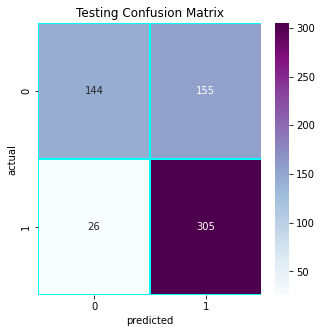

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_m, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Testing Confusion Matrix')
plt.xlabel('predicted', )
plt.ylabel('actual')
plt.show();

## B. Deep Learning Models

### 1.Deep Learning (Bi-directional LSTM) - Creating new Embedding

In [ ]:
import tensorflow as tf
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 300
max_length = 600
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
headlines_train = pd.DataFrame(headlines_train, columns=["headlines"])
headlines_train.head(3)

,headlines
0,a hindrance to operations extracts from the...
1,scorecard the best lake scene leader german s...
2,coventry caught on counter by flo united s riv...


In [ ]:
headlines_test = pd.DataFrame(headlines_test, columns=["headlines"])

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(headlines_train["headlines"])

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(headlines_train["headlines"])
training_padded = pad_sequences(training_sequences, maxlen= max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(headlines_test["headlines"])
testing_padded = pad_sequences(testing_sequences, maxlen= max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded.shape

(3723, 600)

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(train['Label'])
testing_padded = np.array(testing_padded)
testing_labels = np.array(test['Label'])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              320800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,327,265
Trainable params: 3,327,265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
117/117 - 18s - loss: 2.8084 - accuracy: 0.5184 - val_loss: 1.0963 - val_accuracy: 0.5254 - 18s/epoch - 151ms/step
Epoch 2/50
117/117 - 6s - loss: 0.8104 - accuracy: 0.5657 - val_loss: 0.7082 - val_accuracy: 0.5254 - 6s/epoch - 55ms/step
Epoch 3/50
117/117 - 6s - loss: 0.6888 - accuracy: 0.5716 - val_loss: 0.6945 - val_accuracy: 0.5429 - 6s/epoch - 51ms/step
Epoch 4/50
117/117 - 6s - loss: 0.6563 - accuracy: 0.6320 - val_loss: 0.7015 - val_accuracy: 0.5873 - 6s/epoch - 52ms/step
Epoch 5/50
117/117 - 6s - loss: 0.5297 - accuracy: 0.7682 - val_loss: 0.6745 - val_accuracy: 0.6540 - 6s/epoch - 51ms/step
Epoch 6/50
117/117 - 6s - loss: 0.3454 - accuracy: 0.8939 - val_loss: 0.7023 - val_accuracy: 0.6873 - 6s/epoch - 51ms/step
Epoch 7/50
117/117 - 6s - loss: 0.1965 - accuracy: 0.9648 - val_loss: 0.8270 - val_accuracy: 0.6937 - 6s/epoch - 52ms/step
Epoch 8/50
117/117 - 6s - loss: 0.1174 - accuracy: 0.9847 - val_loss: 0.9178 - val_accuracy: 0.6857 - 6s/epoch - 52ms/step
Epoch 9/50
11

In [ ]:
predictions = model.predict(testing_padded)
predictions = np.squeeze(predictions>0.5).astype(int)

20/20 [==============================] - 1s 19ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score
conf_m=confusion_matrix(test['Label'],predictions)
print(conf_m)
print("-------------------------")
acc_s=accuracy_score(test['Label'],predictions)
print(f"accuracy: {acc_s:.2f}")
bacc_s=balanced_accuracy_score(test['Label'],predictions)
print(f"balanced accuracy: {bacc_s:.2f}")
ck_s=cohen_kappa_score(test['Label'],predictions)
print(f"cohen's kappa: {ck_s:.2f}")

[[201  98]
 [ 92 239]]
-------------------------
accuracy: 0.70
balanced accuracy: 0.70
cohen's kappa: 0.39


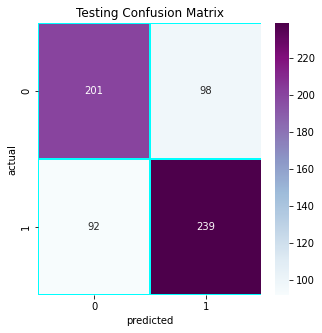

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_m, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Testing Confusion Matrix')
plt.xlabel('predicted', )
plt.ylabel('actual')
plt.show();

### 2.Deep Learning (Bi-directional LSTM) - Using Pre-Trained Embedding (GloVe)

In [ ]:
import tensorflow as tf
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 300
max_length = 600
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
headlines_train = pd.DataFrame(headlines_train, columns=["headlines"])
headlines_train.head(3)

,headlines
0,a hindrance to operations extracts from the...
1,scorecard the best lake scene leader german s...
2,coventry caught on counter by flo united s riv...


In [ ]:
headlines_test = pd.DataFrame(headlines_test, columns=["headlines"])

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(headlines_train["headlines"])

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(headlines_train["headlines"])
training_padded = pad_sequences(training_sequences, maxlen= max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(headlines_test["headlines"])
testing_padded = pad_sequences(testing_sequences, maxlen= max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded.shape

(3723, 600)

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(train['Label'])
testing_padded = np.array(testing_padded)
testing_labels = np.array(test['Label'])

In [ ]:
import numpy as np

def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

In [ ]:
word2vec_path = '/content/drive/MyDrive/Colab Data/glove.6B.300d.txt'
w2v_model = load_glove_model(word2vec_path)

Loading Glove Model
400000 words loaded!


In [ ]:
embedding_weights = np.zeros((vocab_size, embedding_dim))
for word, index in word_index.items():
  try:
    embedding_weights[index, :] = w2v_model[word]
  except KeyError:
    pass
  except IndexError:
    pass

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_weights]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         3000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              320800    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                6432      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,327,265
Trainable params: 3,327,265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
117/117 - 10s - loss: 2.7992 - accuracy: 0.5195 - val_loss: 1.0947 - val_accuracy: 0.5254 - 10s/epoch - 87ms/step
Epoch 2/50
117/117 - 6s - loss: 0.8115 - accuracy: 0.5501 - val_loss: 0.7047 - val_accuracy: 0.5333 - 6s/epoch - 53ms/step
Epoch 3/50
117/117 - 6s - loss: 0.6549 - accuracy: 0.6425 - val_loss: 0.6755 - val_accuracy: 0.6111 - 6s/epoch - 54ms/step
Epoch 4/50
117/117 - 6s - loss: 0.4731 - accuracy: 0.8053 - val_loss: 0.6436 - val_accuracy: 0.6762 - 6s/epoch - 54ms/step
Epoch 5/50
117/117 - 6s - loss: 0.2430 - accuracy: 0.9277 - val_loss: 0.7551 - val_accuracy: 0.6841 - 6s/epoch - 53ms/step
Epoch 6/50
117/117 - 6s - loss: 0.1149 - accuracy: 0.9796 - val_loss: 0.9276 - val_accuracy: 0.6889 - 6s/epoch - 54ms/step
Epoch 7/50
117/117 - 6s - loss: 0.0617 - accuracy: 0.9946 - val_loss: 1.0624 - val_accuracy: 0.6921 - 6s/epoch - 55ms/step
Epoch 8/50
117/117 - 6s - loss: 0.0433 - accuracy: 0.9981 - val_loss: 1.1663 - val_accuracy: 0.6952 - 6s/epoch - 55ms/step
Epoch 9/50
117

In [ ]:
predictions = model.predict(testing_padded)
predictions = np.squeeze(predictions>0.5).astype(int)

20/20 [==============================] - 1s 27ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score
conf_m=confusion_matrix(test['Label'],predictions)
print(conf_m)
print("-------------------------")
acc_s=accuracy_score(test['Label'],predictions)
print(f"accuracy: {acc_s:.2f}")
bacc_s=balanced_accuracy_score(test['Label'],predictions)
print(f"balanced accuracy: {bacc_s:.2f}")
ck_s=cohen_kappa_score(test['Label'],predictions)
print(f"cohen's kappa: {ck_s:.2f}")

[[191 108]
 [ 89 242]]
-------------------------
accuracy: 0.69
balanced accuracy: 0.68
cohen's kappa: 0.37


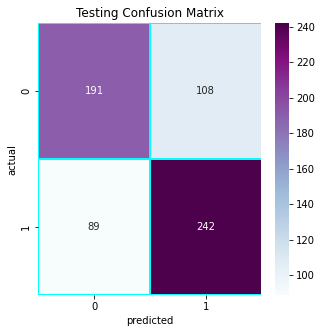

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_m, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Testing Confusion Matrix')
plt.xlabel('predicted', )
plt.ylabel('actual')
plt.show();